This notebook is a compilation equations and visualizations that are frequently used at the **liquid jet X molecular beam** project at UC Berkeley. Content has no specific order.

Import modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Translational energy errors
The following ralations aim to describe translational energy errors when small velocity, energy & angular deviations are applied. Equations are taken from XXX...

## Equations

- Velocity in $\frac{m}{s}$:

$v_{1}=\sqrt{\left(\frac{L\cdot 10^{-2}}{\left( t-\alpha\sqrt{m_1}\right)\cdot 10^{-6}}\right)^2+v^2-2\cdot \left(\frac{L\cdot 10^{-2}}{\left( t-\alpha\sqrt{m_1}\right)\cdot 10^{-6}}\right)\cdot \cos{\theta}}$

- Translational energy in $\frac{kcal}{mol}$:

$E_{trans} =\frac{m_1\cdot v_1^2\cdot 10^{-3}\cdot (0.239\cdot10^{-3})}{2}$

- Total energy in $\frac{kcal}{mol}$:

$E_{total} =E_{trans}\left(1+\frac{m_1}{m_2}\right)$

In [6]:
# Velocity in m/s:
def v_1(length, time, alpha, v, mass_1, th): 
    velocity = np.sqrt(
        ((length*10**-2)/((time-alpha*np.sqrt(mass_1))*10**-6))**2 
        + v**2 
        - 2*((length*10**-2)/((time-alpha*np.sqrt(mass_1))*10**-6))*v*np.cos(np.radians(th)))    
    return velocity

# Translational Energy in kcal/mol:
def E_trans(length, time, alpha, v, mass_1, th):
    energy = mass_1*(v_1(length, time, alpha, v, mass_1, theta))**2*10**-3/2*.239*10**-3    
    return energy

# Total Energy in kcal/mol:
def E_total(length, time, alpha, v, mass_1, mass_2, th):
    energy = E_trans(length, time, alpha, v, mass_1, theta)*(1+mass_1/mass_2)    
    return energy

## Plots

v_1 =  1422.99  m/s
E_2 =  44.78 kcal/mol


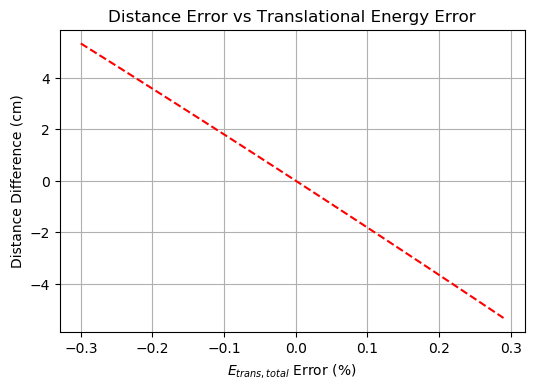

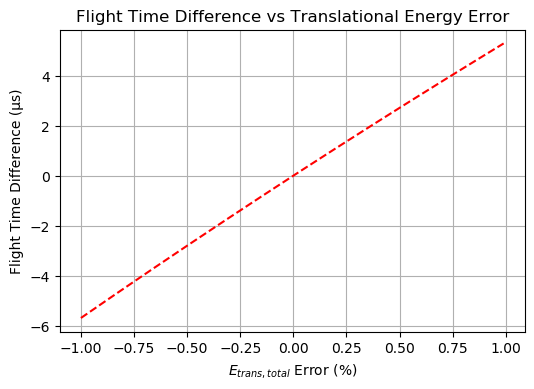

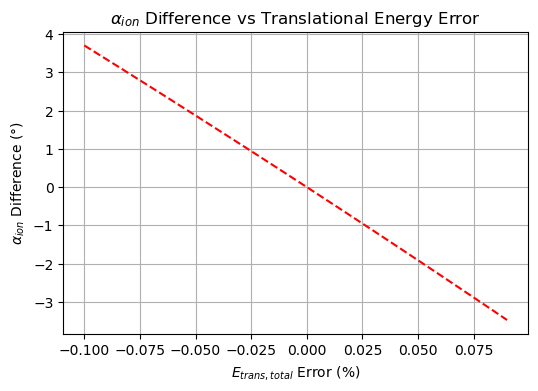

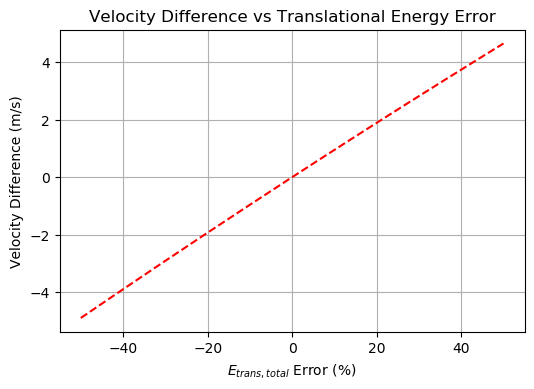

In [28]:
# Define parameters:
m_1 = 47 # in amu, measuring fragment, 47 for xbeam21, CH3S+O channel
m_2 = 16 # in amu
T = 300 # in Celsius
t_TOF = 100 # in micro secs
v_MB = 1900 # in m/s
theta = 20 # Laboratory angle
L = 21.1 # in cm, photolysis point to ionizer
alpha_ion = 4.5

# Define plot ranges:
dist_vs_Etrans_dev = np.arange(-.3, .3, 0.01)
time_vs_Etrans_dev = np.arange(-1.0, 1.0, 0.01)
alpha_vs_Etrans_dev = np.arange(-.1, .1, 0.01)
v_vs_Etrans_dev = np.arange(-50, 50, 0.01)


# Error functions:
dist_vs_Etrans = (E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta)
            -E_total(L+dist_vs_Etrans_dev, t_TOF, alpha_ion, v_MB, m_1, m_2, theta))/E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta)*100

time_vs_Etrans = (E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta)
            -E_total(L, t_TOF+time_vs_Etrans_dev, alpha_ion, v_MB, m_1, m_2, theta))/E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta)*100

alpha_vs_Etrans = (E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta)
            -E_total(L, t_TOF, alpha_ion+alpha_vs_Etrans_dev, v_MB, m_1, m_2, theta))/E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta)*100

v_vs_Etrans = (E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta)
            -E_total(L, t_TOF, alpha_ion, v_MB+v_vs_Etrans_dev, m_1, m_2, theta))/E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta)*100


print('v_1 = ', round(v_1(L, t_TOF, alpha_ion, v_MB, m_1, theta), 2), ' m/s')
print('E_2 = ', round(E_total(L, t_TOF, alpha_ion, v_MB, m_1, m_2, theta), 2), 'kcal/mol')

# Plot Distance Error vs Translational Energy Error
plt.figure(dpi=100)
plt.plot(dist_vs_Etrans_dev, dist_vs_Etrans, 'r--')
plt.title('Distance Error vs Translational Energy Error')
plt.xlabel('$E_{trans,total}$ Error (%)')
plt.ylabel('Distance Difference (cm)')
plt.grid(True)
plt.show()

# Plot Flight Time Difference vs Translational Energy Error
plt.figure(dpi=100)
plt.plot(time_vs_Etrans_dev, time_vs_Etrans, 'r--')
plt.title('Flight Time Difference vs Translational Energy Error')
plt.xlabel('$E_{trans,total}$ Error (%)')
plt.ylabel('Flight Time Difference (μs)')
plt.grid(True)
plt.show()

# Plot alpha_ion Difference vs Translational Energy Error
plt.figure(dpi=100)
plt.plot(alpha_vs_Etrans_dev, alpha_vs_Etrans, 'r--')
plt.title('$α_{ion}$ Difference vs Translational Energy Error')
plt.xlabel('$E_{trans,total}$ Error (%)')
plt.ylabel('$α_{ion}$ Difference (°)')
plt.grid(True)
plt.show()

# Plot Beam Velocity Error vs Translational Energy Error
plt.figure(dpi=100)
plt.plot(v_vs_Etrans_dev, v_vs_Etrans, 'r--')
plt.title('Velocity Difference vs Translational Energy Error')
plt.xlabel('$E_{trans,total}$ Error (%)')
plt.ylabel('Velocity Difference (m/s)')
plt.grid(True)
plt.show()